Below the classic example of Machine Learning, The Titanic dataset.

This script is meant to give an idea of what predictive modelling is. Especially nice for people with little experience in machine learning and predictive modelling.

Brief descriptio: we are using a dataset to let our model learn that certain features, result in a certain outcome (dead or alive). We then fit the data to our model, so that it can predict the outcome of new data. 

In [6]:
## We are using the Pandas Library from Pyhton to prepare our data. 
## Some basic data cleaning was already done in SQL, but us not meaningful for this example.

import pandas as pd

data = pd.read_csv('C:\\Users\\m.ponte\\Desktop\\MP\\ARCH\\Nieuwemap\\Train.csv')
data.head()

,PassengerID,PClass,Name,Sex,Age,Sibsp,Parch,Cabin,Fare,Embarked,Survived
0,1,3,Mr,male,2,1,0,H,1,S,0
1,2,1,Mrs,female,3,1,0,C,6,C,1
2,3,3,Miss,female,2,0,0,H,1,S,1
3,4,1,Mrs,female,2,1,0,C,5,S,1
4,5,3,Mr,male,2,0,0,H,1,S,0


In [37]:
## Iport libraries for viasuals, just to give some insight in data visualisation:

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
df2 = data[['PClass', 'Name', 'Sex', 'Age', 'Sibsp', 'Parch', 'Cabin', 'Fare', 'Embarked']] 

In [11]:
df = pd.get_dummies(df2, columns=['Name', 'Sex', 'Cabin', 'Embarked'])
df.head()

,PClass,Age,Sibsp,Parch,Fare,Name_Else,Name_Master,Name_Miss,Name_Mr,Name_Mrs,...,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_H,Embarked_C,Embarked_Q,Embarked_S
0,3,2,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
1,1,3,1,0,6,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
2,3,2,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,1,2,1,0,5,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
4,3,2,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [15]:
X = df.values
y = data['Survived']

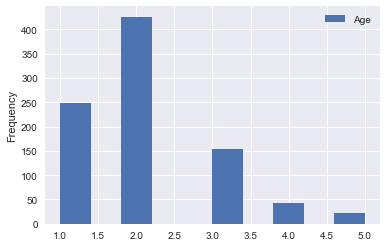

In [77]:
df.Age.plot(kind='hist', legend = True, colormap = None)


In [67]:
df_visual = df[['PClass', 'Age', 'Fare']] 

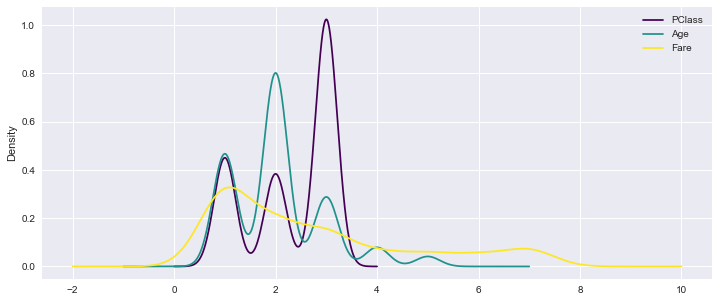

In [73]:
df_visual.plot(kind='kde', legend = True, colormap = 'viridis', figsize = (12,5)) 

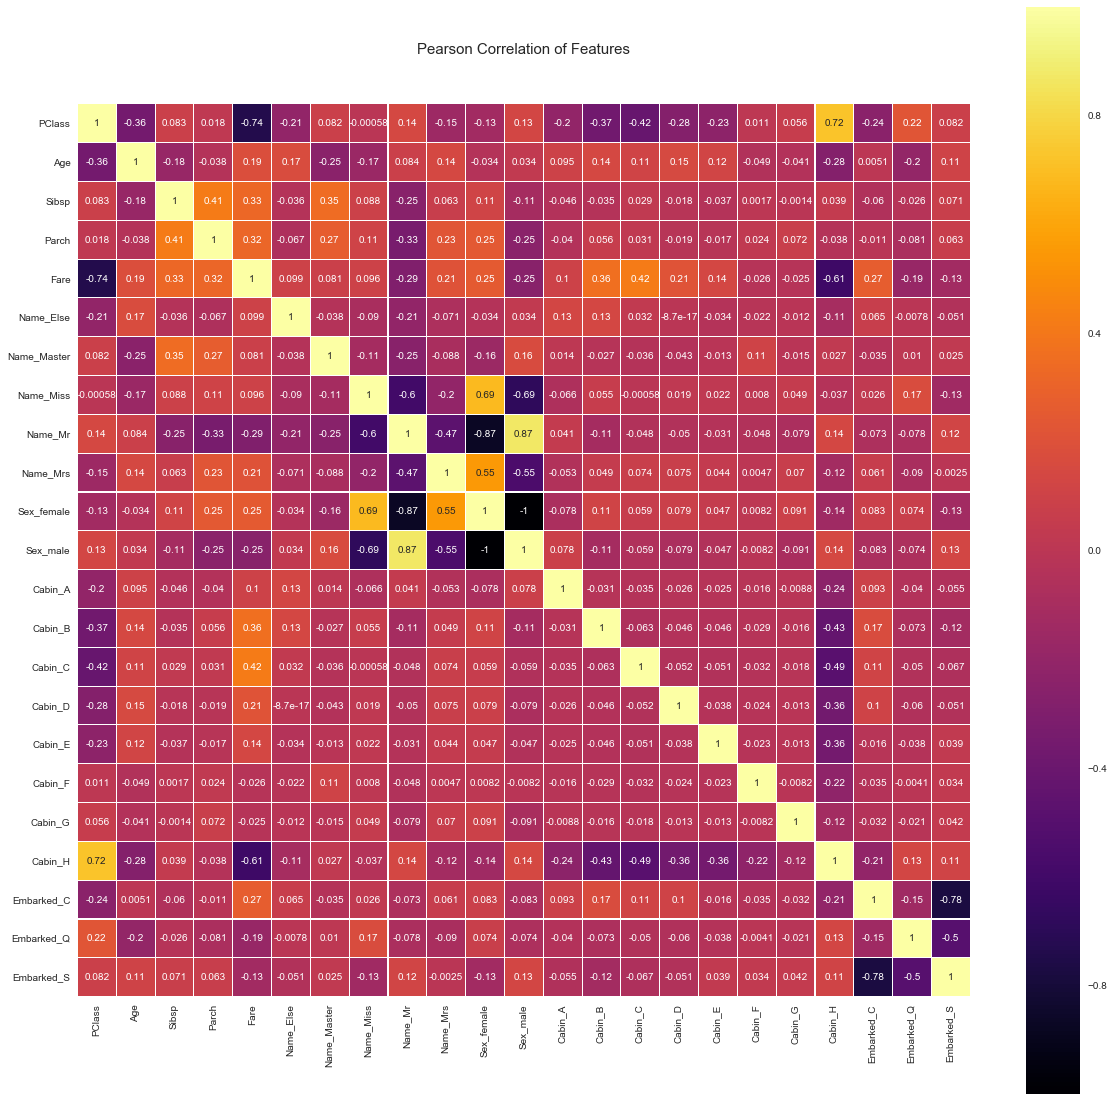

In [44]:
## Visual that provides basic insight in correlation between features.

colormap = plt.cm.inferno
plt.figure(figsize=(20,20))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [16]:
## Machine learing in SciKit Learn (Python module for Machine Learning)

from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
from sklearn import metrics

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [23]:
## Random Forest: Simply put: a collection of decision Trees.

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(min_samples_split=50)
rfc_scores = cross_val_score(rfc, X, y, cv=12, scoring='accuracy')
print(rfc_scores)

rfc_mean = rfc_scores.mean()
print (rfc_mean)

[ 0.77333333  0.78666667  0.78666667  0.81333333  0.88        0.82666667
  0.82432432  0.82432432  0.78378378  0.76712329  0.83561644  0.84931507]
0.812596157802


In [24]:
test = pd.read_csv('C:\\Users\\m.ponte\\Desktop\\MP\\ARCH\\Nieuwemap\\Test.csv')
test.head()

,PassengerID,PClass,Name,Sex,Age,Sibsp,Parch,Cabin,Fare,Embarked
0,892,3,Mr,male,2,0,0,H,1,Q
1,893,3,Mrs,female,3,1,0,H,1,S
2,894,2,Mr,male,5,0,0,H,1,Q
3,895,3,Mr,male,2,0,0,H,1,S
4,896,3,Mrs,female,2,1,1,H,2,S


In [25]:
df2_test = test[['PClass', 'Name', 'Sex', 'Age', 'Sibsp', 'Parch', 'Cabin', 'Fare', 'Embarked']] 

In [26]:
df_test = pd.get_dummies(df2_test, columns=['Name', 'Sex', 'Cabin', 'Embarked'])
df_test.head()

,PClass,Age,Sibsp,Parch,Fare,Name_Else,Name_Master,Name_Miss,Name_Mr,Name_Mrs,...,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_H,Embarked_C,Embarked_Q,Embarked_S
0,3,2,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,3,3,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
2,2,5,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
3,3,2,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
4,3,2,1,1,2,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1


In [27]:
X_test = df_test.values

In [28]:
## Predicting, the fun stuff... :)
## Below you can see the predicted values. (0 = dead, 1 = alive)

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(min_samples_split=50)
rfc.fit(X, y)

Outcome = rfc.predict(X_test)
Outcome

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0,

The code above is a simplified example of a classification model and what it can do.

In fact, the predicitions in this low-complex model, we predicted 80% of the survivals correctly. So, the model learned from our training data and told us, based on that training and feautures of the new data, what the outcome would be.

